Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import tensorflow as tf
import matplotlib.pyplot as plt

CNN Function

In [10]:
def deepLearningWithCNN(path, architectures=3, batch_size=32, epochs=20, activation_o='relu',activation_h='relu'):
    Info_String=''
    try:
        # Load dataset
        data = pd.read_csv(path)

        # Separate features and target
        X = data.drop(columns='Electric Vehicle Type').values
        y = data['Electric Vehicle Type'].values

        # Encode target variable
        le = LabelEncoder()
        y = le.fit_transform(y)

        # Normalize features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Reshape X for CNN (samples, timesteps, features)
        X = X.reshape(X.shape[0], X.shape[1], 1)  # 1 feature channel

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define CNN architectures
        models = []

        for i in range(1, architectures + 1):
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

            # Add CNN layers based on architecture
            if i == 1:  # Basic CNN
                model.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation=activation_h))
                model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
                model.add(tf.keras.layers.Flatten())
            elif i == 2:  # CNN with more filters and Dropout
                model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation=activation_h))
                model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
                model.add(tf.keras.layers.Dropout(0.3))
                model.add(tf.keras.layers.Flatten())
            elif i == 3:  # CNN with Batch Normalization
                model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation=activation_h))
                model.add(tf.keras.layers.BatchNormalization())
                model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
                model.add(tf.keras.layers.Conv1D(128, kernel_size=3, activation=activation_h))
                model.add(tf.keras.layers.BatchNormalization())
                model.add(tf.keras.layers.Flatten())

            # Add output layer
            model.add(tf.keras.layers.Dense(len(np.unique(y)), activation=activation_o))

            # Compile model
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            models.append(model)




        # Train and evaluate models
        for idx, model in enumerate(models, 1):
            print(f"\nTraining Architecture {idx} with activation for output layer: {activation_o} and activation for hidden layer {activation_h} ...")
            history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

            # Evaluate on test data
            y_pred = np.argmax(model.predict(X_test), axis=1)
            acc = accuracy_score(y_test, y_pred)
            print(f"Architecture {idx} - Test Accuracy: {acc:.8f}")

            # Display confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            print(f"Confusion Matrix for Architecture {idx}:")
            print(cm)

            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
            disp.plot(cmap='Blues')
            plt.title(f"Confusion Matrix for Architecture {idx}")
            plt.show()
            Info_String+=f"Architecture {idx}, Output Layer Activation  {activation_o}, Hidden Layer Activation {activation_h}, "



    except FileNotFoundError:
        print(f"File not found at {path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return Info_String

Main


Training Architecture 1 with activation for output layer: relu and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7898 - loss: 0.7061 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7907 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7901 - loss: 0.6932 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7930 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7909 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 1 - Test Accuracy: 0.79053241
Confusion Matrix for Architecture 1:
[[34819     0]
 [ 9226     0]]


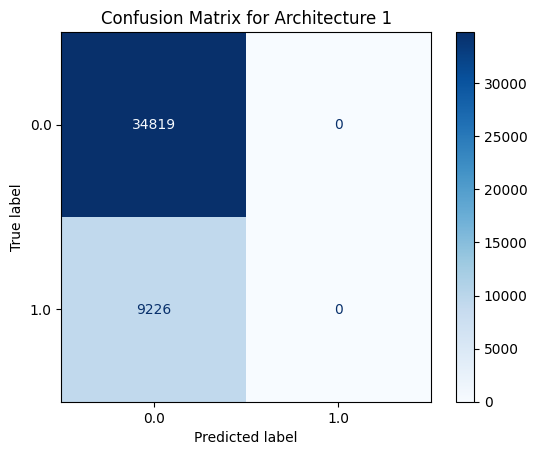


Training Architecture 2 with activation for output layer: relu and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7918 - loss: 0.7466 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7931 - loss: 0.6930 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7921 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7918 - loss: 0.6929 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7927 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 2 - Test Accuracy: 0.79053241
Confusion Matrix for Architecture 2:
[[34819     0]
 [ 9226     0]]


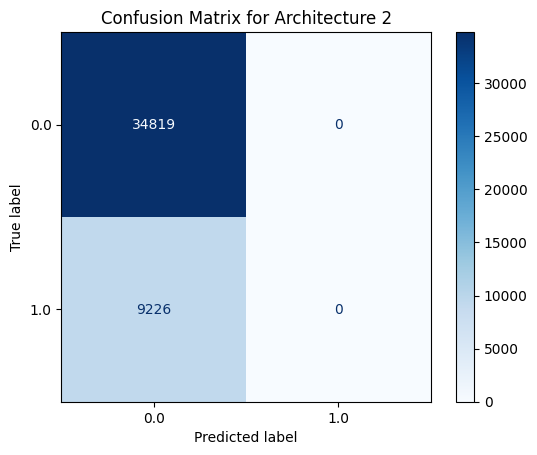


Training Architecture 3 with activation for output layer: relu and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8361 - loss: 0.4806 - val_accuracy: 0.8642 - val_loss: 0.3419
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8405 - loss: 0.3801 - val_accuracy: 0.8047 - val_loss: 0.4463
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8092 - loss: 0.4136 - val_accuracy: 0.7908 - val_loss: 0.4741
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.7917 - loss: 0.4573 - val_accuracy: 0.7910 - val_loss: 0.4664
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7932 - loss: 0.4390 - val_accuracy: 0.7910 - val_loss: 0.4144
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 3 - Test Accuracy: 0.79053241
Confusion Matrix for Architecture 3:
[[34819     0]
 [ 9226     0]]


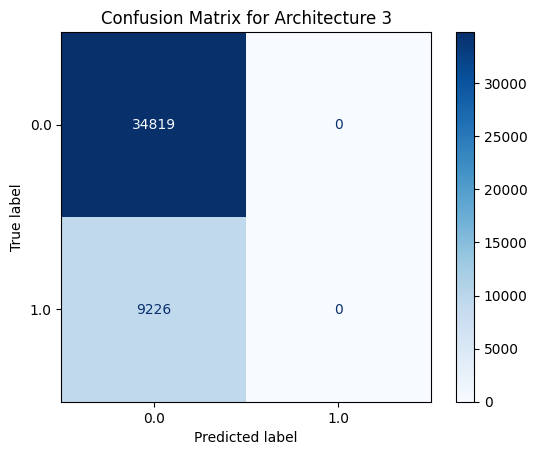


Training Architecture 1 with activation for output layer: relu and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7966 - loss: 0.7587 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7916 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7899 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7913 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7910 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Architecture 1 - Test Accuracy: 0.79053241
Confusion Matrix for Architecture 1:
[[34819     0]
 [ 9226     0]]


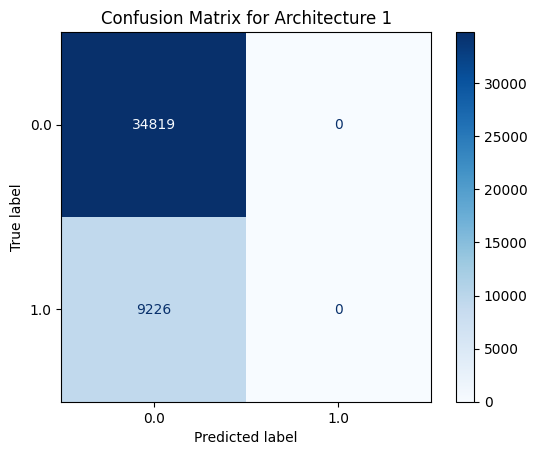


Training Architecture 2 with activation for output layer: relu and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7887 - loss: 0.7656 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7913 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7896 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7915 - loss: 0.6935 - val_accuracy: 0.7910 - val_loss: 0.6932
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7913 - loss: 0.6931 - val_accuracy: 0.7910 - val_loss: 0.6932
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 2 - Test Accuracy: 0.79053241
Confusion Matrix for Architecture 2:
[[34819     0]
 [ 9226     0]]


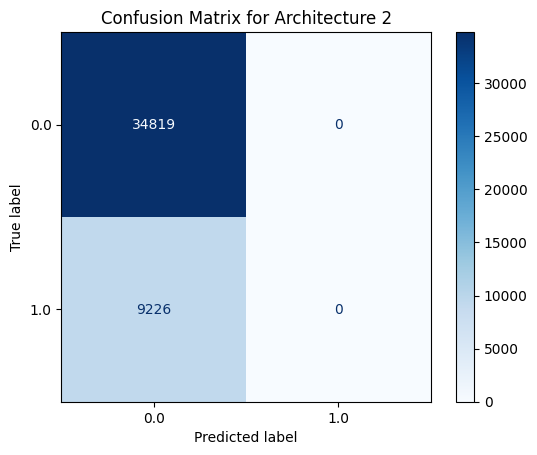


Training Architecture 3 with activation for output layer: relu and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8388 - loss: 0.5580 - val_accuracy: 0.8384 - val_loss: 0.4162
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8298 - loss: 0.4446 - val_accuracy: 0.7967 - val_loss: 0.5484
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8023 - loss: 0.5097 - val_accuracy: 0.7909 - val_loss: 0.4569
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7919 - loss: 0.4421 - val_accuracy: 0.7910 - val_loss: 0.4144
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7914 - loss: 0.4273 - val_accuracy: 0.7911 - val_loss: 0.3830
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 3 - Test Accuracy: 0.79053241
Confusion Matrix for Architecture 3:
[[34819     0]
 [ 9226     0]]


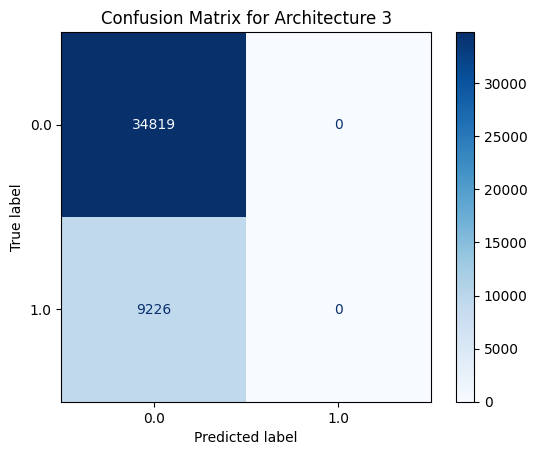


Training Architecture 1 with activation for output layer: sigmoid and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9422 - loss: 0.1647 - val_accuracy: 0.9902 - val_loss: 0.0315
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9913 - loss: 0.0271 - val_accuracy: 0.9940 - val_loss: 0.0211
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9939 - loss: 0.0198 - val_accuracy: 0.9948 - val_loss: 0.0170
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9948 - val_loss: 0.0148
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9961 - val_loss: 0.0122
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 1 - Test Accuracy: 0.99620842
Confusion Matrix for Architecture 1:
[[34694   125]
 [   42  9184]]


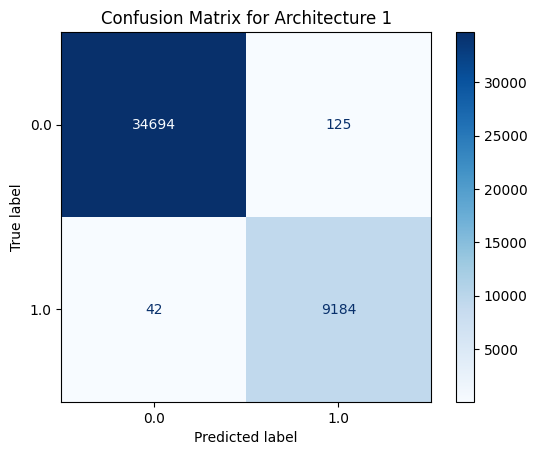


Training Architecture 2 with activation for output layer: sigmoid and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9457 - loss: 0.1550 - val_accuracy: 0.9864 - val_loss: 0.0399
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9837 - loss: 0.0556 - val_accuracy: 0.9893 - val_loss: 0.0312
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9919 - val_loss: 0.0242
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9877 - loss: 0.0432 - val_accuracy: 0.9913 - val_loss: 0.0250
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9918 - val_loss: 0.0228
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Architecture 2 - Test Accuracy: 0.99282552
Confusion Matrix for Architecture 2:
[[34689   130]
 [  186  9040]]


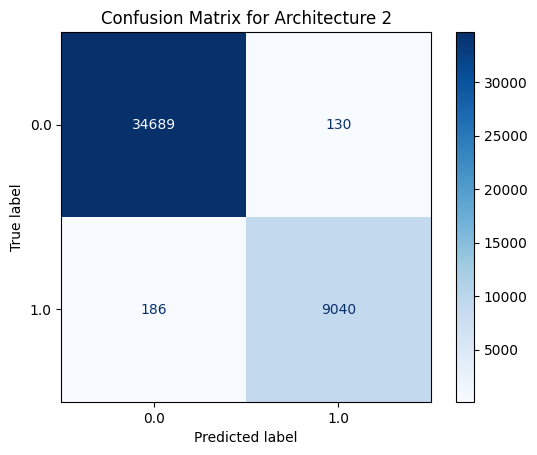


Training Architecture 3 with activation for output layer: sigmoid and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9866 - loss: 0.0434 - val_accuracy: 0.9946 - val_loss: 0.0183
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.9960 - val_loss: 0.0219
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9958 - val_loss: 0.0630
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9964 - val_loss: 0.0575
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9964 - val_loss: 0.0443
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 3 - Test Accuracy: 0.99684414
Confusion Matrix for Architecture 3:
[[34713   106]
 [   33  9193]]


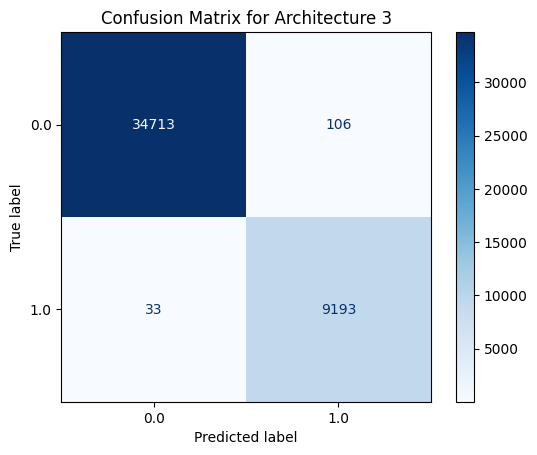


Training Architecture 1 with activation for output layer: sigmoid and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9307 - loss: 0.1948 - val_accuracy: 0.9854 - val_loss: 0.0428
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9885 - loss: 0.0377 - val_accuracy: 0.9912 - val_loss: 0.0261
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9934 - val_loss: 0.0252
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9938 - loss: 0.0200 - val_accuracy: 0.9952 - val_loss: 0.0170
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9952 - loss: 0.0171 - val_accuracy: 0.9964 - val_loss: 0.0144
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 1 - Test Accuracy: 0.99659439
Confusion Matrix for Architecture 1:
[[34724    95]
 [   55  9171]]


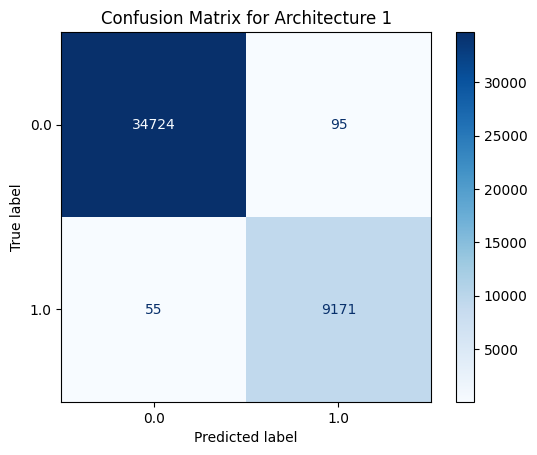


Training Architecture 2 with activation for output layer: sigmoid and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9301 - loss: 0.2013 - val_accuracy: 0.9754 - val_loss: 0.0734
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9749 - loss: 0.0819 - val_accuracy: 0.9862 - val_loss: 0.0451
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9810 - loss: 0.0667 - val_accuracy: 0.9893 - val_loss: 0.0355
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9845 - loss: 0.0579 - val_accuracy: 0.9888 - val_loss: 0.0352
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9855 - loss: 0.0558 - val_accuracy: 0.9904 - val_loss: 0.0282
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 2 - Test Accuracy: 0.99144057
Confusion Matrix for Architecture 2:
[[34664   155]
 [  222  9004]]


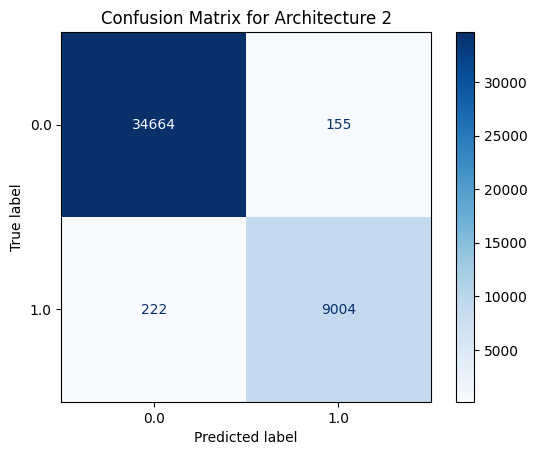


Training Architecture 3 with activation for output layer: sigmoid and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9836 - loss: 0.0539 - val_accuracy: 0.9917 - val_loss: 0.1629
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9946 - loss: 0.0194 - val_accuracy: 0.9963 - val_loss: 0.1248
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9956 - loss: 0.0159 - val_accuracy: 0.9965 - val_loss: 0.0107
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9972 - val_loss: 0.0084
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9969 - loss: 0.0106 - val_accuracy: 0.9974 - val_loss: 0.0104
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 3 - Test Accuracy: 0.99752526
Confusion Matrix for Architecture 3:
[[34729    90]
 [   19  9207]]


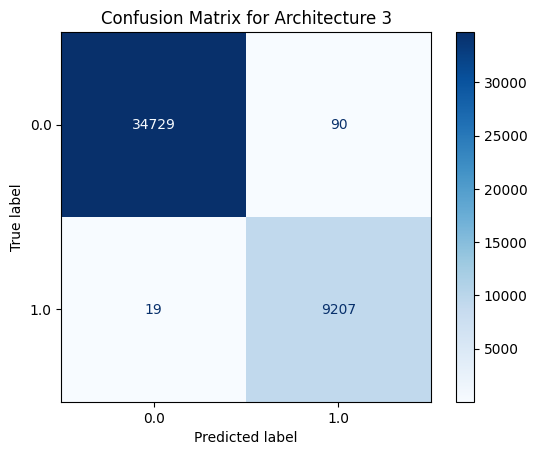


Training Architecture 1 with activation for output layer: softmax and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9384 - loss: 0.1649 - val_accuracy: 0.9905 - val_loss: 0.0309
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9921 - val_loss: 0.0252
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9943 - val_loss: 0.0172
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9954 - val_loss: 0.0148
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9958 - loss: 0.0147 - val_accuracy: 0.9960 - val_loss: 0.0122
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Architecture 1 - Test Accuracy: 0.99620842
Confusion Matrix for Architecture 1:
[[34679   140]
 [   27  9199]]


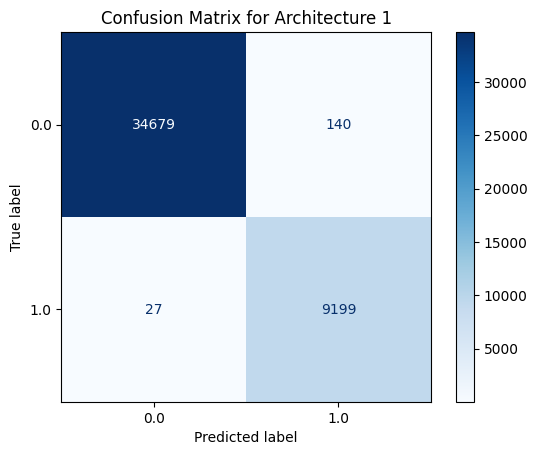


Training Architecture 2 with activation for output layer: softmax and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9460 - loss: 0.1541 - val_accuracy: 0.9896 - val_loss: 0.0369
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9838 - loss: 0.0573 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9849 - loss: 0.0521 - val_accuracy: 0.9905 - val_loss: 0.0300
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9863 - loss: 0.0464 - val_accuracy: 0.9915 - val_loss: 0.0292
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9878 - loss: 0.0410 - val_accuracy: 0.9921 - val_loss: 0.0233
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 2 - Test Accuracy: 0.99266659
Confusion Matrix for Architecture 2:
[[34605   214]
 [  109  9117]]


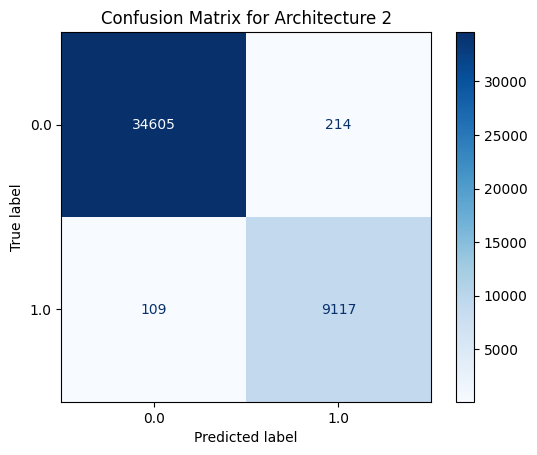


Training Architecture 3 with activation for output layer: softmax and activation for hidden layer relu ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9861 - loss: 0.0440 - val_accuracy: 0.9936 - val_loss: 0.0924
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9953 - loss: 0.0170 - val_accuracy: 0.9947 - val_loss: 0.0162
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9966 - val_loss: 0.0357
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.9977 - val_loss: 0.0088
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9971 - loss: 0.0085 - val_accuracy: 0.9965 - val_loss: 0.0433
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 3 - Test Accuracy: 0.99663980
Confusion Matrix for Architecture 3:
[[34713   106]
 [   42  9184]]


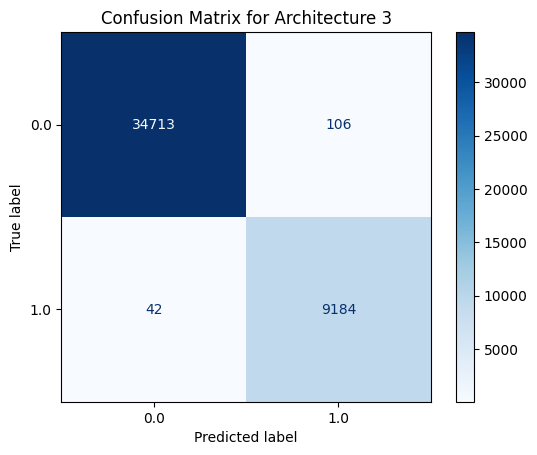


Training Architecture 1 with activation for output layer: softmax and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9280 - loss: 0.1960 - val_accuracy: 0.9840 - val_loss: 0.0589
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9907 - val_loss: 0.0405
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9918 - val_loss: 0.0287
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9952 - val_loss: 0.0151
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9953 - val_loss: 0.0174
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 1 - Test Accuracy: 0.99548189
Confusion Matrix for Architecture 1:
[[34674   145]
 [   54  9172]]


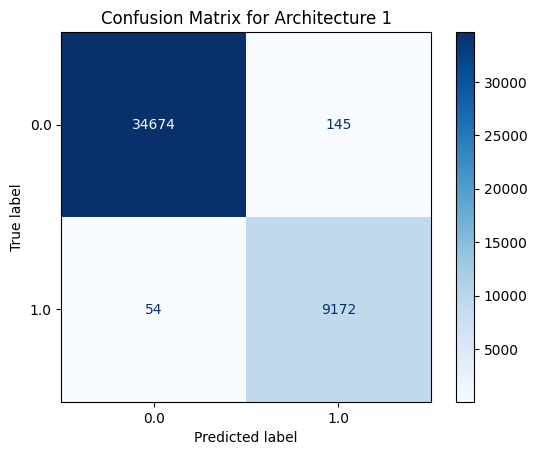


Training Architecture 2 with activation for output layer: softmax and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9293 - loss: 0.1995 - val_accuracy: 0.9789 - val_loss: 0.0652
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9753 - loss: 0.0801 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9808 - loss: 0.0644 - val_accuracy: 0.9888 - val_loss: 0.0381
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9835 - loss: 0.0591 - val_accuracy: 0.9875 - val_loss: 0.0397
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9840 - loss: 0.0556 - val_accuracy: 0.9898 - val_loss: 0.0389
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Architecture 2 - Test Accuracy: 0.99055511
Confusion Matrix for Architecture 2:
[[34620   199]
 [  217  9009]]


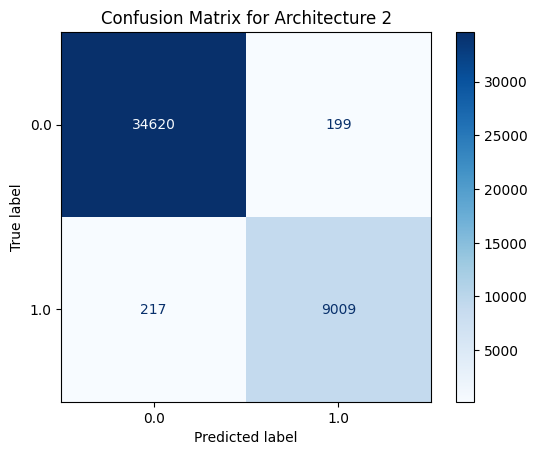


Training Architecture 3 with activation for output layer: softmax and activation for hidden layer swish ...
Epoch 1/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9823 - loss: 0.0559 - val_accuracy: 0.9962 - val_loss: 0.0230
Epoch 2/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9952 - loss: 0.0190 - val_accuracy: 0.9946 - val_loss: 0.0415
Epoch 3/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.9963 - val_loss: 0.0556
Epoch 4/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9959 - val_loss: 0.0379
Epoch 5/5
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9972 - val_loss: 0.0198
1377/1377 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 3 - Test Accuracy: 0.99693495
Confusion Matrix for Architecture 3:
[[34753    66]
 [   69  9157]]


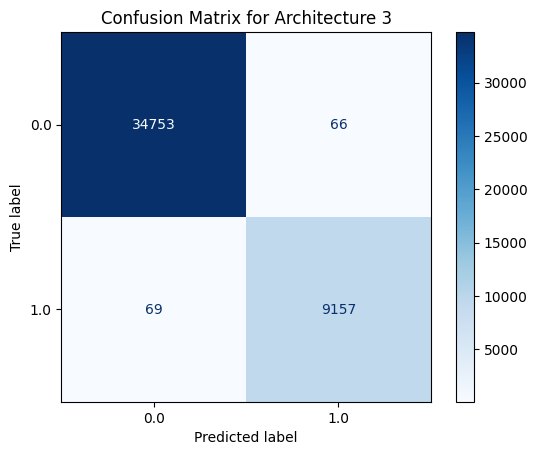

Architecture 1, Output Layer Activation  relu, Hidden Layer Activation relu, Architecture 2, Output Layer Activation  relu, Hidden Layer Activation relu, Architecture 3, Output Layer Activation  relu, Hidden Layer Activation relu, Architecture 1, Output Layer Activation  relu, Hidden Layer Activation swish, Architecture 2, Output Layer Activation  relu, Hidden Layer Activation swish, Architecture 3, Output Layer Activation  relu, Hidden Layer Activation swish, Architecture 1, Output Layer Activation  sigmoid, Hidden Layer Activation relu, Architecture 2, Output Layer Activation  sigmoid, Hidden Layer Activation relu, Architecture 3, Output Layer Activation  sigmoid, Hidden Layer Activation relu, Architecture 1, Output Layer Activation  sigmoid, Hidden Layer Activation swish, Architecture 2, Output Layer Activation  sigmoid, Hidden Layer Activation swish, Architecture 3, Output Layer Activation  sigmoid, Hidden Layer Activation swish, Architecture 1, Output Layer Activation  softmax, Hi

In [ ]:
dataset_path = "ev_data_normalized.csv"
activation_functions_outputlayer=['relu','sigmoid','softmax']
activation_functions_hidden_layer=['relu','swish']
Info_String=""
for activation_o in activation_functions_outputlayer:
  for activation_h in activation_functions_hidden_layer:
    Info_String+=deepLearningWithCNN(dataset_path, architectures=3, batch_size=32, epochs=50,activation_o=activation_o,activation_h=activation_h)
print(Info_String)